In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
df_stars = pd.read_csv("stars.csv")

In [3]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [5]:
le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

[0 1 2 3 4 5]


In [6]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,Blue,O
236,30839,834042.000000,1194.0000,-10.63,1,Blue,O
237,8829,537493.000000,1423.0000,-10.73,1,White,A
238,9235,404940.000000,1112.0000,-11.23,1,White,A


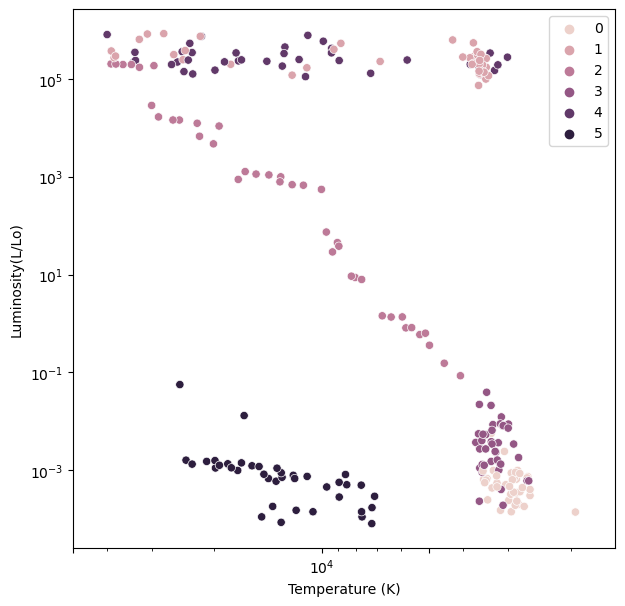

In [7]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

In [8]:
df_stars_num = df_stars.iloc[:, :-3] #creo nuovo dataset con solo le colonne con valori reali

In [9]:
df_stars_num

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [10]:
rows_with_nan = df_stars_num[df_stars_num.isnull().any(axis=1)]
print(rows_with_nan)
#non ci sono righe con nan values

Empty DataFrame
Columns: [Temperature (K), Luminosity(L/Lo), Radius(R/Ro), Absolute magnitude(Mv)]
Index: []


In [11]:
pca = PCA(n_components=2) 
pca.fit(df_stars_num) 

stars_new = pca.transform(df_stars_num) 
#mean = pca.mean_ 
#eigenvectors = pca.components_ multiply each by respective eigenvalue to reconstruct

# Reconstruction of object1
# Xreconstruct[0] = mean + eigenvectors*eigenvalues[0]
evals = pca.explained_variance_ratio_
print(evals) 
#print(eigenvectors.shape)


[0.99760631 0.0023879 ]


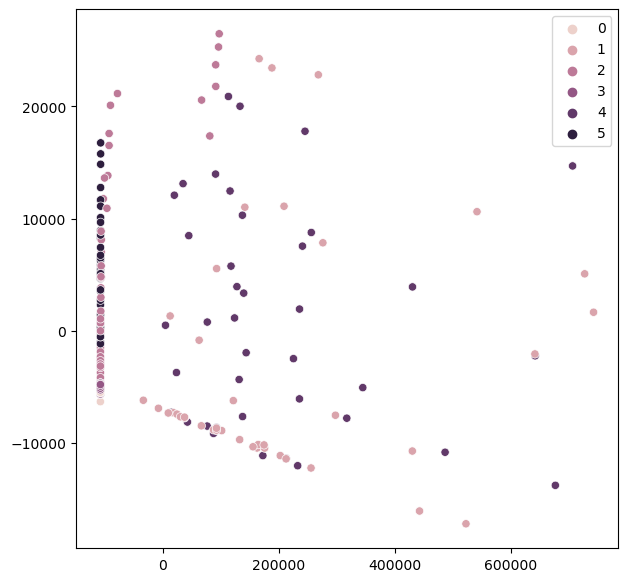

In [12]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars_num, x=stars_new[:,0], y=stars_new[:,1] , hue=labels)
plt.show()

In [13]:
#pulisco i dati

scaler = StandardScaler()

df_stars_standardized = scaler.fit_transform(df_stars_num)

df_stars_standardized = pd.DataFrame(df_stars_standardized, columns=df_stars_num.columns)

In [14]:
pca_pul = PCA(n_components=2) 
pca_pul.fit(df_stars_standardized) 

stars_reduced = pca_pul.transform(df_stars_standardized)
evals_pul = pca_pul.explained_variance_ratio_
print(evals)

[0.99760631 0.0023879 ]


<Axes: >

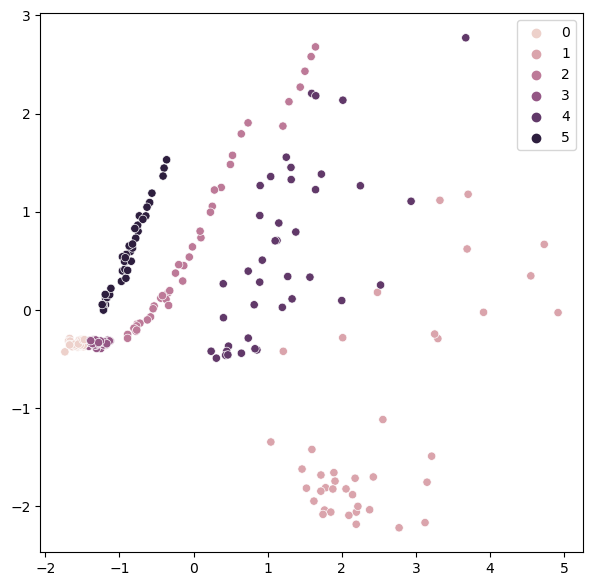

In [15]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot( x=stars_reduced[:,0], y=stars_reduced[:,1] , hue=labels)

In [16]:
#CLASSIFICATION dei dati ridotti

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest=train_test_split(stars_reduced,labels, train_size=0.70, random_state=42)


In [25]:
accuracy_test=[]
accuracy_train=[]
mean_scores = []

depth=np.arange(2,20)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

for d in depth:
    
    tree = DecisionTreeClassifier(max_depth=d, random_state=42,criterion='entropy')
    
    scores = cross_val_score(tree, stars_reduced, labels, cv=kf, scoring='accuracy')
    
    mean = np.mean(scores)
    mean_scores=np.append(mean_scores, mean)
    
    tree.fit(Xtrain, ytrain)
    
    ypred_test=tree.predict(Xtest)
    accuracy_test=np.append(accuracy_test, accuracy_score(ytest, ypred_test))   
    
    ypred_train=tree.predict(Xtrain)
    accuracy_train=np.append(accuracy_train,accuracy_score(ytrain, ypred_train))   
    
best_depth = depth[np.argmax(mean_scores)]
print("Migliore profondità trovata: ", best_depth)

Migliore profondità trovata:  7


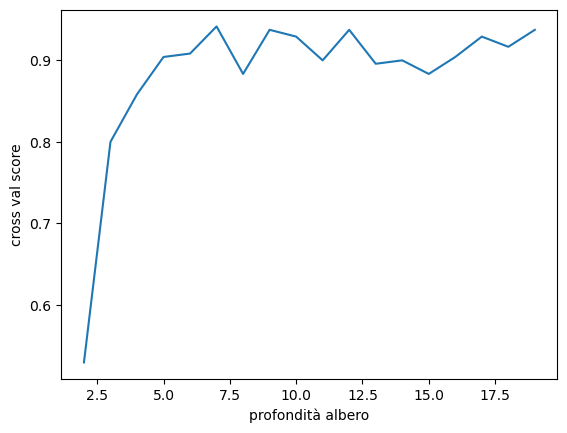

In [28]:
plt.plot(depth, mean_scores)
plt.xlabel("profondità albero")
plt.ylabel("cross val score")
plt.show()

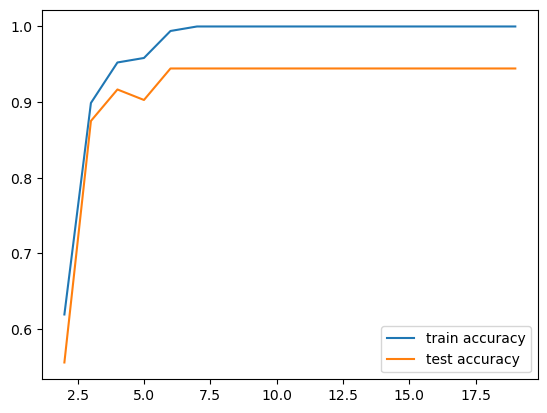

In [29]:
plt.plot(depth, accuracy_train, label="train accuracy")
plt.plot(depth, accuracy_test, label="test accuracy")
plt.legend()
plt.show()

In [31]:
#profondità viene scelta guardando l'andamento dell'accuracy del test set
best_tree=DecisionTreeClassifier(max_depth=best_depth, random_state=42,criterion='entropy')

best_tree.fit(Xtrain, ytrain)
ypred_test=best_tree.predict(Xtest)
ypred_train=best_tree.predict(Xtrain)

confusion=confusion_matrix(ytest, ypred_test)

train_accuracy=accuracy_score(ytrain, ypred_train)
test_accuracy=accuracy_score(ytest, ypred_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)
print("confusion matrix:")
print(confusion)

train accuracy:  1.0
test accuracy:  0.9444444444444444
confusion matrix:
[[14  0  0  0  0  0]
 [ 0 14  0  0  1  0]
 [ 0  0  9  0  1  0]
 [ 0  0  0 12  0  0]
 [ 0  2  0  0  9  0]
 [ 0  0  0  0  0 10]]


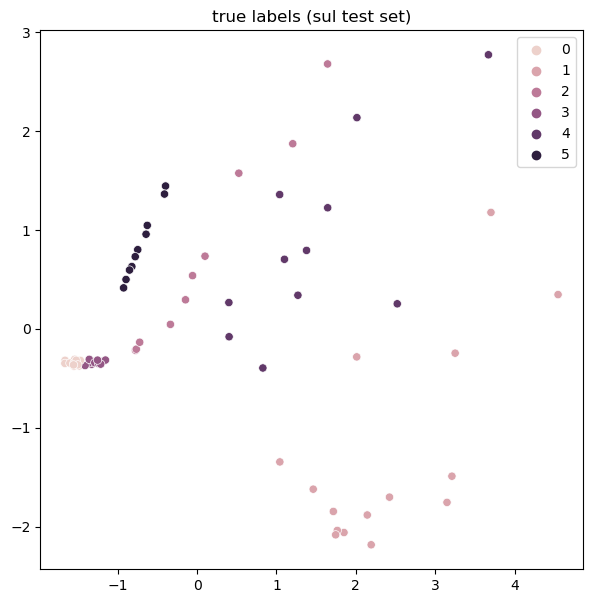

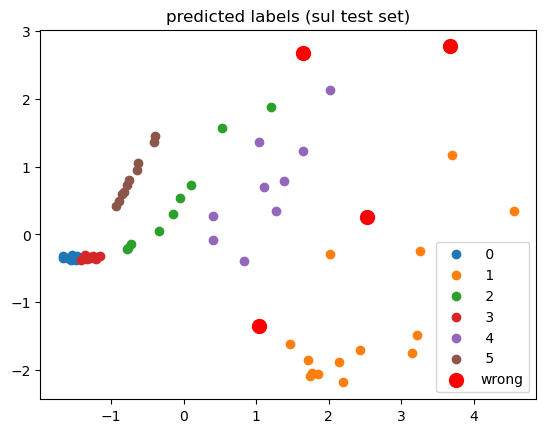

In [32]:
fig = plt.figure(figsize=(7, 7))
plot=sns.scatterplot( x=Xtest[:,0], y=Xtest[:,1] , hue=ytest)
plot.set_title("true labels (sul test set)")
plt.show()

incorrect_indices = np.where(ytest != ypred_test)[0]
correct_indices = np.where(ytest == ypred_test)[0]

for class_value in np.unique(ytest):
    plt.scatter(Xtest[correct_indices][ytest[correct_indices] == class_value, 0],
                Xtest[correct_indices][ytest[correct_indices] == class_value, 1],
                label=f' {class_value}')



plt.scatter(Xtest[incorrect_indices, 0],
            Xtest[incorrect_indices, 1],
            facecolors='r', edgecolors='r', label='wrong', s=100)

plt.legend()
plt.title('predicted labels (sul test set)')
plt.show()

In [33]:
#classification sulla dimensione T e L (standardizzate)

T = df_stars['Temperature (K)'].values
L = df_stars['Luminosity(L/Lo)'].values

dati_fis = np.column_stack((np.log(T), np.log(L)))
#print(dati_fis)

Xtrain, Xtest, ytrain, ytest=train_test_split(dati_fis,labels, train_size=0.70, random_state=42)

In [34]:
accuracy_test=[]
accuracy_train=[]
mean_scores = []

depth=np.arange(2,20)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

for d in depth:
    
    tree = DecisionTreeClassifier(max_depth=d, random_state=42,criterion='entropy')
    
    scores = cross_val_score(tree, stars_reduced, labels, cv=kf, scoring='accuracy')
    
    mean = np.mean(scores)
    mean_scores=np.append(mean_scores, mean)
    
    tree.fit(Xtrain, ytrain)
    
    ypred_test=tree.predict(Xtest)
    accuracy_test=np.append(accuracy_test, accuracy_score(ytest, ypred_test))   
    
    ypred_train=tree.predict(Xtrain)
    accuracy_train=np.append(accuracy_train,accuracy_score(ytrain, ypred_train))   
    
best_depth = depth[np.argmax(mean_scores)]
print("Migliore profondità trovata: ", best_depth)

Migliore profondità trovata:  7


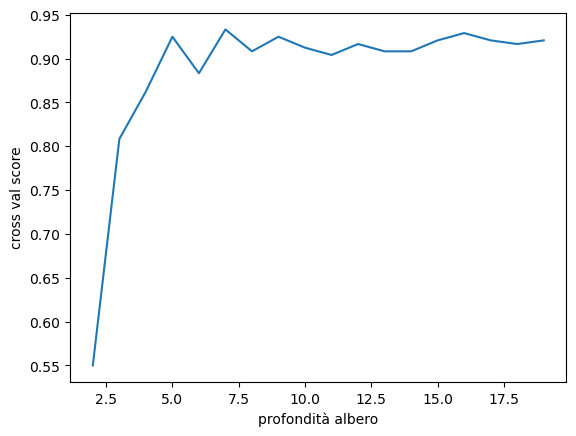

In [35]:
plt.plot(depth, mean_scores)
plt.xlabel("profondità albero")
plt.ylabel("cross val score")
plt.show()

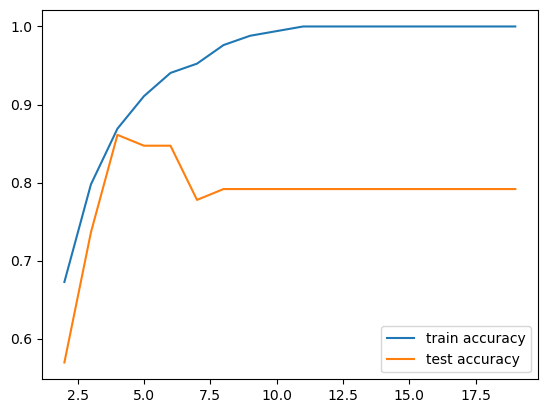

In [36]:
plt.plot(depth, accuracy_train, label="train accuracy")
plt.plot(depth, accuracy_test, label="test accuracy")
plt.legend()
plt.show()

In [38]:
#come profondità scelgo 4, perchè poi test accuracy diminuisce->sintomo overfit

best_tree=DecisionTreeClassifier(max_depth=4, random_state=42,criterion='entropy')

best_tree.fit(Xtrain, ytrain)
ypred_test=best_tree.predict(Xtest)
ypred_train=best_tree.predict(Xtrain)

confusion=confusion_matrix(ytest, ypred_test)

train_accuracy=accuracy_score(ytrain, ypred_train)
test_accuracy=accuracy_score(ytest, ypred_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)
print("confusion matrix:")
print(confusion)

train accuracy:  0.8690476190476191
test accuracy:  0.8611111111111112
confusion matrix:
[[13  0  0  1  0  0]
 [ 0 11  0  0  4  0]
 [ 0  0  9  0  1  0]
 [ 0  0  0 12  0  0]
 [ 0  4  0  0  7  0]
 [ 0  0  0  0  0 10]]


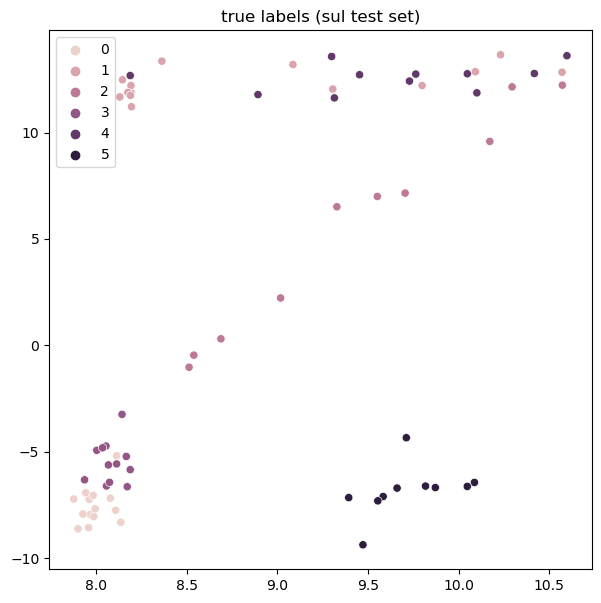

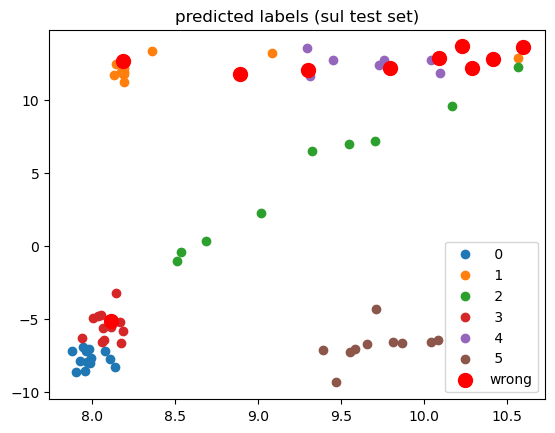

In [39]:
fig = plt.figure(figsize=(7, 7))
plot=sns.scatterplot( x=Xtest[:,0], y=Xtest[:,1] , hue=ytest)
plot.set_title("true labels (sul test set)")
plt.show()

incorrect_indices = np.where(ytest != ypred_test)[0]
correct_indices = np.where(ytest == ypred_test)[0]

for class_value in np.unique(ytest):
    plt.scatter(Xtest[correct_indices][ytest[correct_indices] == class_value, 0],
                Xtest[correct_indices][ytest[correct_indices] == class_value, 1],
                label=f' {class_value}')



plt.scatter(Xtest[incorrect_indices, 0],
            Xtest[incorrect_indices, 1],
            facecolors='r', edgecolors='r', label='wrong', s=100)

plt.legend()
plt.title('predicted labels (sul test set)')
plt.show()